In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
X=np.load("X (1).npy")
Y=np.load("Y (1).npy")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [5]:
X.shape

(3248, 101)

In [6]:
input_size = 101
hidden_size = 200
num_classes = 200
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [7]:
Y.shape

(3248,)

In [8]:
Y

array([0, 0, 0, ..., 3, 0, 0])

In [9]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [10]:
model = Net(input_size,hidden_size,num_classes)
model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
epochs = 100

In [12]:
# test
losses=[]
for epoch in range(epochs):
    
    epoch +=1
    
    for x,y in zip(X_train,Y_train):
        y=np.array([y])
        x=torch.from_numpy(np.expand_dims(x, axis=0))
        y=torch.from_numpy(y)
        
        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))
        
        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        
            
        loss = criterion(outputs, labels)
        

        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.018697738647460938
epoch 2, loss 0.02185678482055664
epoch 3, loss 0.016516685485839844
epoch 4, loss 0.010637283325195312
epoch 5, loss 0.008754730224609375
epoch 6, loss 0.005758762359619141
epoch 7, loss 0.003573894500732422
epoch 8, loss 0.0018358230590820312
epoch 9, loss 0.0012121200561523438
epoch 10, loss 0.0007143020629882812
epoch 11, loss 0.000316619873046875
epoch 12, loss 0.0001811981201171875
epoch 13, loss 0.0001392364501953125
epoch 14, loss 0.0001277923583984375
epoch 15, loss 4.863739013671875e-05
epoch 16, loss 2.765655517578125e-05
epoch 17, loss 3.910064697265625e-05
epoch 18, loss 1.239776611328125e-05
epoch 19, loss 1.9073486328125e-06
epoch 20, loss 1.9073486328125e-06
epoch 21, loss 1.9073486328125e-06
epoch 22, loss 1.9073486328125e-06
epoch 23, loss 0.0
epoch 24, loss 0.0
epoch 25, loss 0.0


KeyboardInterrupt: 

## Evaluate the performance on the training data

In [13]:
# X_train and Y_train
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

train_correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,train_compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(train_compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        train_correct+=1

print("The train accuracy is {}".format((train_correct/total_train_compounds)*100))

The train accuracy is 99.89736572015053


## Evaluate the model on the testing data

In [14]:
# X_test and Y_test
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 78.76923076923077


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

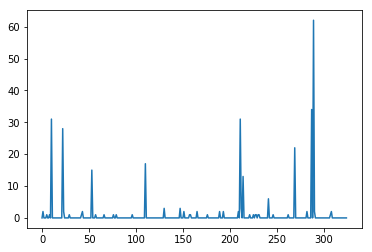

In [16]:
plt.plot(Y_test_pred)

In [17]:
## For the entire dataset

In [18]:
#X and Y
model_pred=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 97.78325123152709


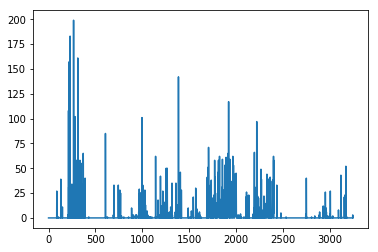

In [19]:
plt.plot(Y_pred)

torch.save(model.state_dict(),"Classification using DNN-Final.pytorch")

In [24]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(Y_test,Y_test_pred)*19/200

23.704692307692309

In [29]:
mean_squared_error(Y_pred,Y)*19/200

2.372806342364532

In [30]:
mean_squared_error(Y_train_pred,Y_train)*19/200

0.00097502565856996226